Intercept    30.719176
light        -1.635004
dtype: float64
Intercept             52.170841
light                 -7.371327
np.power(light, 2)     0.273966
dtype: float64


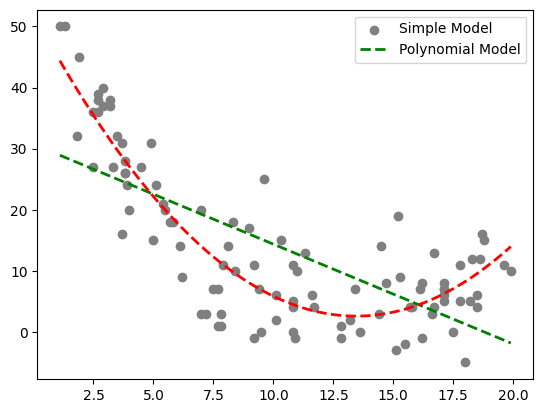

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

plants = pd.read_csv('plants.csv')

simple = sm.OLS.from_formula('dead ~ light', data=plants).fit()
print(simple.params)

polynomial = sm.OLS.from_formula('dead ~ light + np.power(light,2)', data=plants).fit()
print(polynomial.params)

x = np.linspace(plants['light'].min(), plants['light'].max(), 100)
y_p = polynomial.predict(pd.DataFrame({'light': x}))
y_s = simple.predict(pd.DataFrame({'light': x}))

plt.scatter(plants['light'],plants['dead'], color = 'grey')
plt.plot(x, y_s, linestyle='dashed', linewidth=2, color='green')
plt.plot(x, y_p, linestyle='dashed', linewidth=2, color='red')
plt.legend(['Simple Model','Polynomial Model'])
plt.show()